In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification, load_wine, load_breast_cancer, load_diabetes, load_digits

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
def plot_scatter(x, y, auto_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')
    
    if not auto_scaled:
        plt.axis('square')
    
    plt.grid(True)
    plt.title(title)
    
    plt.show()
    
def return_X_y(data, target_column):
    return data.drop(target_column, axis=1), data[target_column]

In [4]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

# Homework

# Exercise 1 - Scaling (2 points)

Perform standardization for wine dataset (wine_data) using only basic python, numpy and pandas (without using StandardScaler and sklearn at all). Implementation of function (or class) that can get dataset as input and return standardized dataset as output is preferrable, but not necessary.

Compare you results (output) with StandardScaler.

NOTE:

1 point for functional version, 
2 points for implementing scaling as sklearn pipeline compartible class.
Maximum for the exercise is 2 points.

# Simple version (1 point)

In [5]:
def scale(X):
    df=X.copy()
    for i in df.columns:
        st=np.std(df.loc[:,i])
        df.loc[:,i]=(df.loc[:,i]-df.loc[:,i].mean())/st
    return df  


In [6]:
assert np.allclose(np.array(scale(wine_data)), StandardScaler().fit_transform(wine_data))

# Exercise 2 - Visualization (3 points)

As noted earlier, standardization/normalization of data can be crucial for some distance-based ML methods.

Let’s generate some toy example of unnormalized data and visualize the importance of this process once more:

In [7]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
data

array([[ -2.8515259 ,  -0.98604353],
       [ 26.50458023,  -1.55274733],
       [  0.1245378 ,  -1.46540597],
       ...,
       [-11.09039786,   4.98993013],
       [ -0.13798722,   7.35223348],
       [ -9.08398319,   6.3697796 ]])

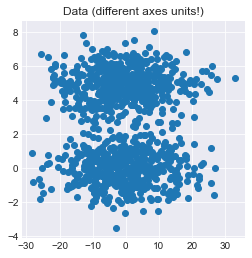

In [8]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=True, title='Data (different axes units!)')

NOTE: on the plot above axes are scaled differently and we can clearly see two potential classes/clusters. In fact matplotlib performed autoscaling (which is basically can be considered as MinMaxScaling of original data) just for better visualization purposes.

Let's turn this feature off and visualize the original data on the plot with equally scaled axes:

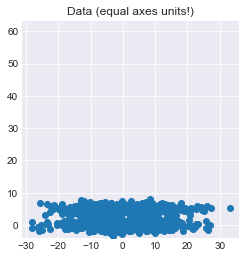

In [9]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False , title='Data (equal axes units!)')

This picture is clearly less interpretable, but much closer to "how distance-based algorithm see the original data": separability of data is hardly noticable only because the variation (std) of x-feature is much bigger in absolute numbers.

Perform StandardScaling and MinMaxScaling of original data; visualize results for each case (use plot_scatter with auto_scaled=False):

# MinMaxScaling (0.5 point)

In [10]:
x_values=(data[:,0]-data[:,0].min())/(data[:,0].max()-data[:,0].min())
y_valyes=(data[:,1]-data[:,1].min())/(data[:,1].max()-data[:,1].min())

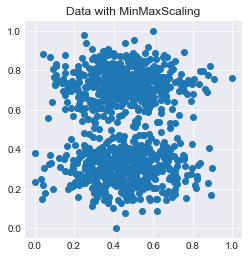

In [11]:
plot_scatter(x_values, y_valyes, auto_scaled=False , title='Data with MinMaxScaling')

# StandardScaler (0.5 point)

In [12]:
x_values1=(data[:,0]-data[:,0].mean())/(data[:,0].std())
y_valyes1=(data[:,1]-data[:,1].mean())/(data[:,1].std())

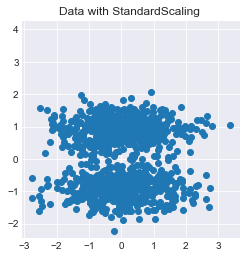

In [13]:
plot_scatter(x_values1, y_valyes1, auto_scaled=False , title='Data with StandardScaling ')

# (Bonus) K-means (2 points)

Illustrate the impact of scaling on basic distance-based clustering algorithm K-means using data generated above.

NOTE: basically, you don't need understanding K-means algorithm here, you just need to:

1) run algorithm (with k=2, k - number of clusters/classes) on unscaled data
2) run algorithm (with k=2) on scaled data
3) plot results: highlight different clusters using different colors.

You can use this question as a hint, but I recommend you to plot results using plot_scatter with equal_scaled=True: it might help you to intuitively understand the reasons of such scaling impact.

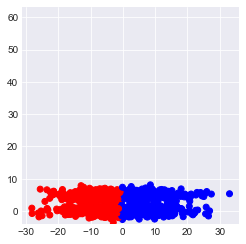

In [14]:
from sklearn.cluster import KMeans
km = KMeans(2)

clusters1 = km.fit_predict(np.array(data))
plot_scatter(data[:,0],data[:,1], auto_scaled=False, clusters=clusters1)

data2 = np.column_stack([x_values, y_valyes])
clusters2 = km.fit_predict(np.array(data2))


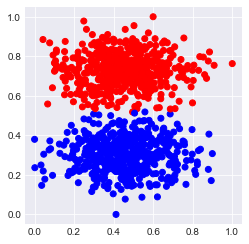

In [15]:
data2 = np.column_stack([x_values, y_valyes])
clusters2 = km.fit_predict(np.array(data2))
plot_scatter(x_values, y_valyes, auto_scaled=False, clusters=clusters2)

# Exercise 3 - Preprocessing Pipeline (2 points)

In [16]:
wine_train, wine_val, wine_labels_train, wine_labels_val = train_test_split(wine_data, wine_labels, 
                                                                            test_size=0.3, random_state=42)

Train model (for example, LogisticRegression(solver='liblinear', penalty='l1') on raw wine_train data; then train same model after data scaling; then add feature selection (and train model again on scaled data). For each experiment all required preprocessing steps (if any) should be wrapped into sklearn pipeline.

Measure accuracy of all 3 approaches on wine_val dataset. Describe and explain results.

In [17]:
#Train model on raw wine_train data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', penalty='l1')
pipe1=Pipeline(steps=[('regression', model)])
pipe1.fit(wine_train, wine_labels_train)
print(f'train accuracy:  {pipe1.score(wine_train, wine_labels_train)} ')
print (f'test accuracy:  {pipe1.score(wine_val, wine_labels_val)} ')

train accuracy:  0.967741935483871 
test accuracy:  0.9814814814814815 


In [18]:
#Train model after data scaling
scaler=MinMaxScaler()
pipe2=Pipeline(steps=[('scalling', scaler), ('regression', model)])
pipe2.fit(wine_train, wine_labels_train)
print(f'train accuracy:  {pipe2.score(wine_train, wine_labels_train)} ')
print (f'test accuracy:  {pipe2.score(wine_val, wine_labels_val)} ')

train accuracy:  0.967741935483871 
test accuracy:  1.0 


In [19]:
#Train model after data scaling and feature selection
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
pipe3=Pipeline(steps=[('selection', sel), ('scalling', scaler), ('regression', model)])
pipe3.fit(wine_train, wine_labels_train)
print(f'train accuracy:  {pipe3.score(wine_train, wine_labels_train)} ')
print (f'test accuracy:  {pipe3.score(wine_val, wine_labels_val)} ')

train accuracy:  0.967741935483871 
test accuracy:  1.0 


Наименьшая точность без стандартизации. После стандартизации ( или стандартизации и отбора признаков) точность выше. Это еще раз доказывает важность предподготовки данных


# Exercise 4 - manual PCA (5 points)

Additional 2 point are given for visualization of the results.

# PCA (3 points)

In [142]:
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

Find a covariance matrix of standartized data and assing it to S.

In [143]:
s=StandardScaler().fit_transform(wine_data)
S=(s.T@s)/(s.shape[0]-1)

If your code is correct, the following assert should be Ok.

In [144]:
assert np.allclose(np.linalg.norm(S), 5.787241159764733)

In [145]:
from scipy.optimize import minimize

def objective(x):
    return -(x.T@S@x)
    # your code: write objective of the problem (don't forget that scipy does min while we need max)

def norm_constraint(x):
    sum_x=0
    for i in x:
        sum_x+=i**2
    
    return sum_x-1

    # your code: constaraint norm of x to be 1, function should return 0 if constraint holds

con1 = {'type': 'eq', 'fun': norm_constraint}

x0 = np.zeros(13) # your code: initial vector to start optimization

sol = minimize(objective, 
               x0, 
               constraints = [con1]
              )
x0 = sol.x


Hurray! We have first vector! Let's do another one.

In [146]:
def orthogonality_constraint(x):
    
    # your code: x should be orthogonal to x0, function should return 0 if constraint holds
       return x.T@x0
    
con2 = {'type': 'eq', 'fun': orthogonality_constraint}

x1 = np.zeros(13)


sol = minimize(objective, 
               x1, 
               constraints = [con2, con1]
              )

x1 = sol.x

If your solution is correct, the following asserts should be Ok.

In [147]:
assert np.allclose(x0@S@x0, 4.732436977583595)
assert np.allclose(x1@S@x1, 2.5110809296451233)

# Visualization (2 points)

Visualize the points after applying custom dimension reduction with 2 components.

In [148]:
wine_data_sc=scale(wine_data)

In [149]:
def transform(x, x0):
    df=x.copy()
    count=0
    for i in df.columns:
        df.loc[:,i]=df.loc[:,i]*x0[count]
        count+=1
    return df.sum(axis=1) 
axis1=transform(wine_data_sc, x0)
axis2=transform(wine_data_sc, x1)

<AxesSubplot:>

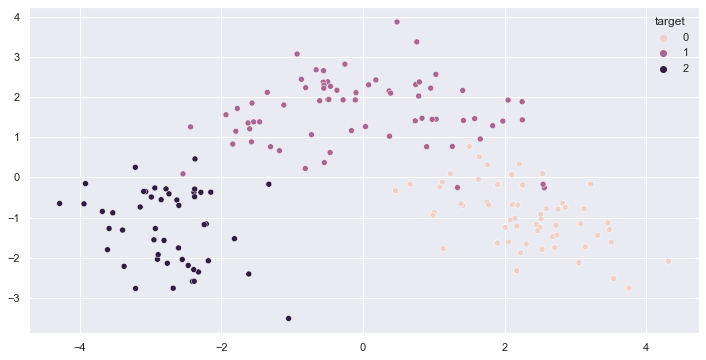

In [150]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.scatterplot(x=axis1, y=axis2, hue=wine_labels)


# Exercise 5 - Boruta (3 points)

Let us classify handwritten digits 0, 1 and 2. To make task not so easy the images are binarized (no shadows of gray present) as it happens with xerocopied documents.

Let us also find out to which parts of an image there's no need to look in order to clasify three digits of interest.

In [237]:
X, y = load_digits(n_class=3, return_X_y=True, as_frame=True)
X = (X>10).astype(int)

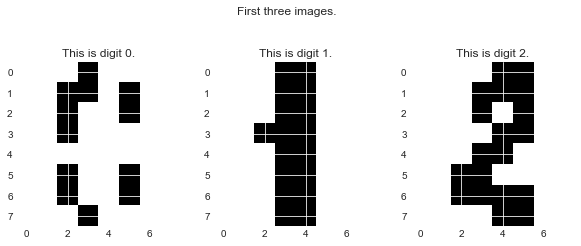

In [238]:
f, ax = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    ax[i].imshow(X.iloc[i].values.reshape(8,8))
    ax[i].set_title(f"This is digit {y[i]}.")
plt.suptitle("First three images.")
plt.show()

Split data into train and test, let test size be 30% of the dataset and fix random state to 42:

In [244]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [245]:
assert y_val.shape[0] == 162
assert y_val.sum() == 169

Fit a RandomForestClassifier with max_depth=13 and evaluate it's performance:

In [251]:
clf = RandomForestClassifier(max_depth=13)
clf.fit(x_train, y_train)
acc = clf.score(x_val, y_val)
print(acc)

0.9876543209876543


In [252]:
assert acc > 0.98

Now we will use Boruta to find redundand pixels. If the package is not installed in your system, uncomment and run the following cell.

In [253]:
! pip install boruta

In [255]:
from boruta import BorutaPy

feat_selector = BorutaPy(RandomForestClassifier(max_depth=13), 
                         n_estimators='auto', 
                         verbose=0, 
                         max_iter=100,
                         random_state=42)
feat_selector.fit(np.array(x_train), np.array(y_train))
green_area = x_train.columns[feat_selector.support_].to_list()
blue_area = x_train.columns[feat_selector.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_1_2', 'pixel_1_5', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_7_2', 'pixel_7_3', 'pixel_7_5', 'pixel_7_6']
features in the blue area: ['pixel_1_4']


Let us print redundant pixels as a mask. Does the result looks similar to mine (or to Among us chracters)?

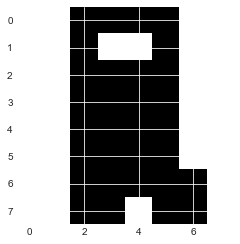

In [260]:
mask = np.array(feat_selector.support_).reshape(8,8)
plt.imshow(mask);

At the end let us redo classification but only with selected features

In [265]:
clf = RandomForestClassifier(max_depth=13)


In [266]:
selected_features_test=x_val[green_area]

In [267]:
selected_features_train=x_train[green_area]

In [268]:
clf.fit(selected_features_train, y_train)
acc = clf.score(selected_features_test, y_val)
print(acc)

0.9938271604938271


In [269]:
assert acc > 0.99